<a href="https://colab.research.google.com/github/matchbou/kaggle-study-20190410/blob/master/Travelling%20Santa%202018%20Using%20TSP%20Solver%20Forked-201904121150-concorde-install-success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#GPU 設定確認

!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()


  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 13.0 GB  | Proc size: 114.5 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [22]:
#os確認
!cat /etc/issue
#メモリ確認
!free -h
#CPUスペック確認
!cat /proc/cpuinfo
#GPUスペック確認
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information
#Colab起動後経過時間
!cat /proc/uptime | awk '{print $1 /60 /60 /24 "days (" $1 "sec)"}'
    
    

Ubuntu 18.04.2 LTS \n \l

              total        used        free      shared  buff/cache   available
Mem:            12G        387M         10G        900K        1.8G         12G
Swap:            0B          0B          0B
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat arch_cap

In [0]:
# https://www.kaggle.com/ashishpatel26/travelling-santa-2018-using-tsp-solver-forked

# Travelling Santa 2018 Using TSP Solver Forked

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"matchbou","key":"0bb292e80b8f97a13913b333aa348a4a"}'}

In [1]:
!pwd

/content


In [2]:
!ls -a

.  ..  .config	sample_data


In [0]:
#!rm kaggle.json
#!mv 'kaggle (1).json' kaggle.json

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!pip install kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# kaggleデータ置き場とjupyernoteのカレントディレクトリフォルダを作成

!mkdir ./input
!mkdir ./notebook

In [9]:
!pwd 

/content


In [10]:
!ls -a

.  ..  .config	input  kaggle.json  notebook  sample_data


In [0]:
#osライブラリ読込してinputに移動⇒kaggleデータもダウンロード　⇒ notebookフォルダに移動
import os
os.chdir('input')




In [12]:
#https://www.kaggle.com/c/titanic/data
!kaggle competitions download -c traveling-santa-2018-prime-paths



  0% 0.00/3.64M [00:00<?, ?B/s]
100% 3.64M/3.64M [00:00<00:00, 118MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 108MB/s]


In [0]:
os.chdir('../notebook')

In [14]:
!pwd

/content/notebook


In [15]:
!ls -a ../input

.  ..  cities.csv.zip  sample_submission.csv.zip


In [16]:
!unzip ../input/cities.csv.zip -d ../input

Archive:  ../input/cities.csv.zip
  inflating: ../input/cities.csv     


In [17]:
!unzip ../input/sample_submission.csv.zip -d ../input

Archive:  ../input/sample_submission.csv.zip
  inflating: ../input/sample_submission.csv  


In [18]:
!ls  ../input

cities.csv  cities.csv.zip  sample_submission.csv  sample_submission.csv.zip


In [19]:
#上記操作の結果以下のディレクトリ配置となる

# /content/notebook このipynbのカレントディレクトリ
# /content/input カグルからダウンロードしたcsvファイルの置き場所

!pwd
!ls -a ../input


/content/notebook
.   cities.csv	    sample_submission.csv
..  cities.csv.zip  sample_submission.csv.zip


In [0]:
#ここからカーネルの内容に踏み込む

In [23]:
!pip install git+https://github.com/cehorn/GLRM.git

  Cloning https://github.com/cehorn/GLRM.git to /tmp/pip-req-build-7wacne0s
  Stored in directory: /tmp/pip-ephem-wheel-cache-xvr8kmzz/wheels/2e/7c/1d/3bbefe79335a1ecc7affcb9ec174a14cd9ba908738aecca7eb
Successfully built GLRM


In [0]:
#os.chdir('..')

#!pwd

#os.makedirs('git')

#os.chdir('git')



In [32]:
!git clone https://github.com/jvkersch/pyconcorde

Cloning into 'pyconcorde'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 195 (delta 0), reused 0 (delta 0), pack-reused 190
Receiving objects: 100% (195/195), 108.52 KiB | 4.93 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [33]:
#!ls -a

#os.chdir('git')

.  ..  pyconcorde


In [0]:
os.chdir('pyconcorde')

In [35]:
!pip install -e .

Obtaining file:///content/git/pyconcorde
  Running setup.py develop for pyconcorde


In [0]:
os.chdir('../../notebook')

In [0]:
# http://kyopro.hateblo.jp/entry/2018/11/11/062308
# http://www.math.uwaterloo.ca/tsp/concorde/index.html
# concorde別途検討の上インストール必要

from concorde.tsp import TSPSolver
from matplotlib import collections  as mc
import numpy as np
import pandas as pd
import time
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
cities = pd.read_csv('../input/cities.csv')

In [40]:
# Instantiate solver
solver = TSPSolver.from_data(
    cities.X,
    cities.Y,
    norm="EUC_2D"
)

t = time.time()
tour_data = solver.solve(time_bound = 60.0, verbose = True, random_seed = 42) # solve() doesn't seem to respect time_bound for certain values?
print(time.time() - t)
print(tour_data.found_tour)

70.82048487663269
True


In [0]:
pd.DataFrame({'Path': np.append(tour_data.tour,[0])}).to_csv('submission.csv', index=False)

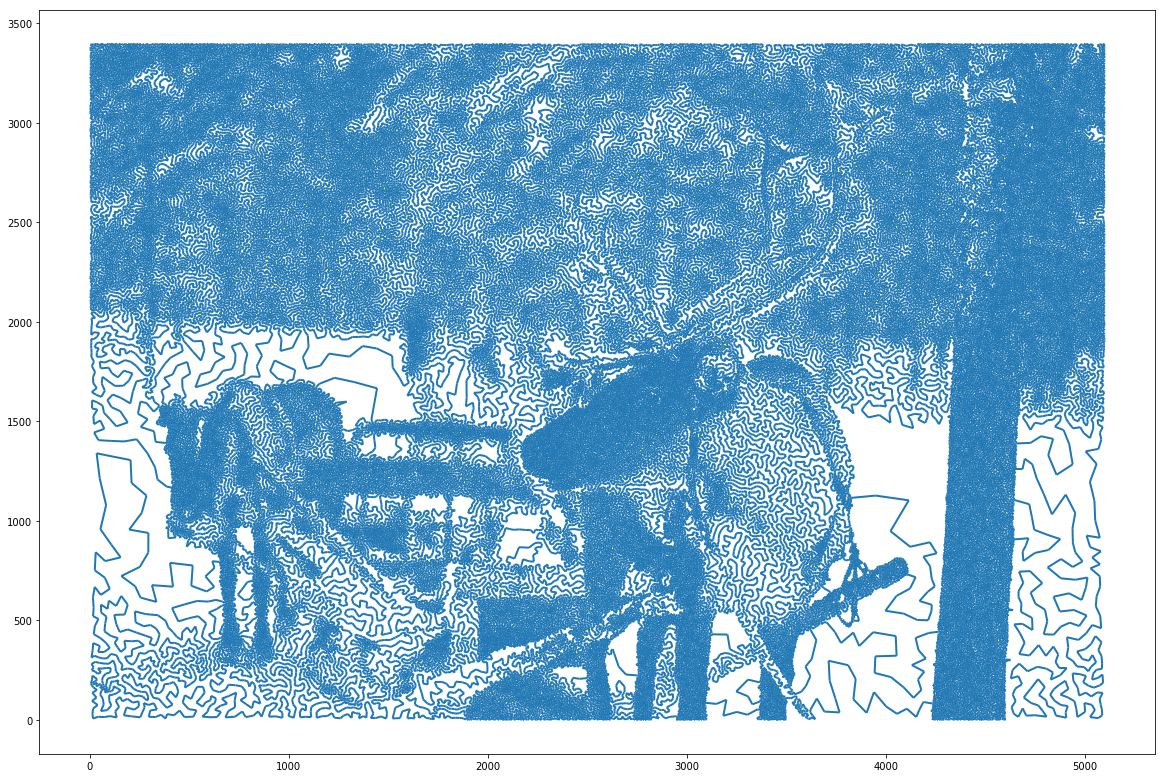

In [42]:
# Plot tour
lines = [[(cities.X[tour_data.tour[i]],cities.Y[tour_data.tour[i]]),(cities.X[tour_data.tour[i+1]],cities.Y[tour_data.tour[i+1]])] for i in range(0,len(cities)-1)]
lc = mc.LineCollection(lines, linewidths=2)
fig, ax = pl.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.add_collection(lc)
ax.autoscale()